 Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-info">
    
План работ (по замечанию ревьюера) 
    
    1. Открыть файл с данными и изучить его. 
    2. Сделать предварительную обработку данных (восстановить пропущенные значения в столбцах, исправить типы столбцов, устранить явные и неявные дубликаты, обратить внимание на редкие и выбивающиеся значения).  
    3. Добавить в таблицу новые столбцы.  
    4. Провести исследовательский анализ данных.
    
    
</div>


### Откройте файл с данными и изучите общую информацию. 

1.	Загрузите данные из файла в датафрейм.
2.	Изучите общую информацию о полученном датафрейме.
3.	Постройте общую гистограмму для всех числовых столбцов таблицы. Например, для датафрейма data это можно сделать командой data.hist(figsize=(15, 20)).

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print (data.head(5))
len1=len(data)
data.info()

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

Описание данных
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
•	balcony — число балконов
•	ceiling_height — высота потолков (м)
•	cityCenters_nearest — расстояние до центра города (м)
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)
•	first_day_exposition — дата публикации
•	floor — этаж
•	floors_total — всего этажей в доме
•	is_apartment — апартаменты (булев тип)
•	kitchen_area — площадь кухни в квадратных метрах (м²)
•	last_price — цена на момент снятия с публикации
•	living_area — жилая площадь в квадратных метрах (м²)
•	locality_name — название населённого пункта
•	open_plan — свободная планировка (булев тип)
•	parks_around3000 — число парков в радиусе 3 км
•	parks_nearest — расстояние до ближайшего парка (м)
•	ponds_around3000 — число водоёмов в радиусе 3 км
•	ponds_nearest — расстояние до ближайшего водоёма (м)
•	rooms — число комнат
•	studio — квартира-студия (булев тип)
•	total_area — общая площадь квартиры в квадратных метрах (м²)
•	total_images — число фотографий квартиры в объявлении


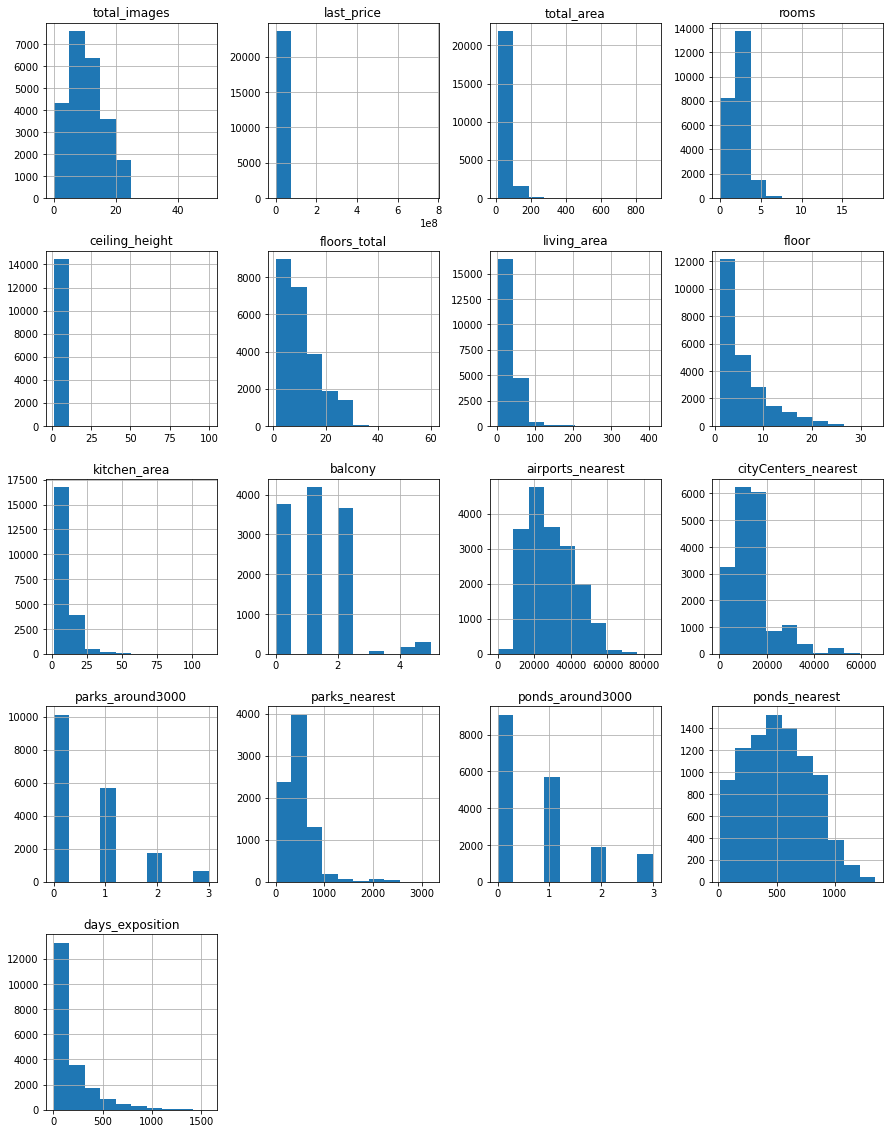

In [2]:
data.hist(figsize=(15, 20)); #; - Не выводим текстовую инфо

# Предобработка данных

1.	Найдите и изучите пропущенные значения в столбцах:  
o	Определите, в каких столбцах есть пропуски.  
o	Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.  
o	В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

In [3]:
#Пустоты
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
data.duplicated().sum() #Есть дубликаты? 

0

In [5]:
#нет данных о балконах
print( pd.isna(data['balcony']).sum() )
#на 0 поменяем
data['balcony'] = data['balcony'].fillna(0)
pd.isna(data['balcony']).sum()

11519


0

In [6]:
#ХОТЕЛ УДАЛИТЬ ПО ЗАМЕЧАНИЮ РЕВЬЮЕРА, см. комментарии на синем фоне
#нет данных о числе этажей floors_total
print( pd.isna(data['floors_total']).sum() )
#на -1 поменяем
data['floors_total'] = data['floors_total'].fillna(-1)
pd.isna(data['floors_total']).sum()

86


0

_Вывод 2.1_. Пропуски данных - либо не указаны в объявлении, либо человеческий фактор. 

<div class="alert alert-block alert-info">
Пытался убрать замену NaN на -1, но при дальнейшей попытке пробразовать float в int получаю ошибку:
    Cannot convert non-finite values (NA or inf) to integer
</div>

In [7]:
#УЧТЕНО ЗАМЕЧАНИЕ РЕВЬЮЕРА (на красном фоне)
#По столбцу living_area - иногда продавцы могут не указывать данное значение, однако, 
#мы можем попробовать его вычислить. Нужно найти соотношение медианной общей площади к медианной жилой.
la_ratio=data['total_area'].median()/data['living_area'].median()
#затем, заполнить пропуски в столбце living_area отношением общей площади к найденному соотношению.
data['living_area'] = data['living_area'].fillna(data['total_area']/la_ratio)
print ( pd.isna(data['living_area']).sum() )# нет пропусков
#Со столбцом kitchen_area можно поступить так же, как со столбцом living_area.
ka_ratio=data['total_area'].median()/data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']/la_ratio)
pd.isna(data['kitchen_area']).sum() # нет пропусков

0


0

2.	Рассмотрите типы данных в каждом столбце:  
o	Найдите столбцы, в которых нужно изменить тип данных.  
o	Преобразуйте тип данных в выбранных столбцах.  
o	В ячейке с типом markdown поясните, почему нужно изменить тип данных.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
#floors_total - сделаем int
data['floors_total'] = data['floors_total'].astype('int')
#проверка типа
data['floors_total'].dtypes

dtype('int64')

In [10]:
#balcony - сделаем int
data['balcony'] = data['balcony'].astype('int')
#проверка типа
data['balcony'].dtypes

dtype('int64')

In [11]:
#parks_around3000 - сделаем int, пустоту заполняем 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int')
#проверка типа
data['parks_around3000'].dtypes

dtype('int64')

In [12]:
#parks_around3000 - сделаем int, пустоту заполняем 0
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].astype('int')
#проверка типа
data['parks_around3000'].dtypes

dtype('int64')

In [13]:
#parks_around3000 - сделаем int, пустоту заполняем 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
#проверка типа
data['parks_around3000'].dtypes

dtype('int64')

In [14]:
#parks_around3000 - сделаем int, пустоту заполняем 0
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
#проверка типа
data['parks_around3000'].dtypes

dtype('int64')

In [15]:
#is_apartment - сделаем bool
data['is_apartment'] = data['is_apartment'].astype('bool')
#проверка типа
data['is_apartment'].dtypes

dtype('bool')

In [16]:
data.info('')
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

_Вывод 2.2._ Поменяли типы дынных для экономии памяти (float24 на int24) и корректности (object на bool). 


3.	Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.


In [17]:
#data['locality_name']
data['locality_name'] = data['locality_name'].fillna("-")
#data[data['locality_name'].str.contains('пос')]
#Названия нас. пунктов
# print(sorted(data['locality_name'].unique()))
# и их количество
# уникальных значений названий - 365
print('Начальное к-во названий нас. пунктов',len(sorted(data['locality_name'].unique())))
#data.pivot_table(index='locality_name', columns='total_images', values='total_images', aggfunc='count')
#print(data.pivot_table(index='locality_name', values='total_images', aggfunc='count') )
#проводим анализ названий в EXCEL, выделяем названия с большой буквы и удаляем неявные дубликаты
data['locality_name_good'] =data['locality_name']
data['locality_name_good'] = data['locality_name_good'].str.replace('поселок', 'посёлок')
data['locality_name_good'] = data['locality_name_good'].str.replace('посёлок Рябово', 'посёлок городского типа Рябово') 
#data['locality_name_good'] = data['locality_name_good'].str.replace('Кудрово', 'деревня Кудрово') 
#data['locality_name_good'] = data['locality_name_good'].str.replace('Любань', 'посёлок Любань') 
#data['locality_name_good'] = data['locality_name_good'].str.replace('городской посёлок Большая Ижора', 'посёлок городского типа Большая Ижора') 
#data['locality_name_good'] = data['locality_name_good'].str.replace('городской посёлок Лесогорский', 'посёлок городского типа Лесогорский') 
data['locality_name_good'] = data['locality_name_good'].str.replace('городской посёлок', 'посёлок городского типа')
 
#data[data['locality_name_good'].str.contains('пос')]
#print(data.pivot_table(index='locality_name_good', values='total_images', aggfunc='count') )
print ("Обработанные названия нас. пунктов")
print(sorted(data['locality_name_good'].unique()))
print('Конечное к-во названий нас. пунктов',len(sorted(data['locality_name_good'].unique())))



Начальное к-во названий нас. пунктов 365
Обработанные названия нас. пунктов
['-', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'деревня Агалатово', 'деревня Аро', 'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда', 'деревня Большая Пустомержа', 'деревня Большие Колпаны', 'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара', 'деревня Выскатка', 'деревня Гарболово',

_Вывод 3_. Проведя анализ названий в EXCEL, выделяем названия с большой буквы и удаляем неявные дубликаты (с 365 до 323 шт)

4.	Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах. 
o	Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
o	В противном случае удалите редкие и выбивающиеся значения.
o	В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.


In [18]:
#высота потолков
#data.plot(x='local_time', y='ceiling_height', style='o', ylim=(0, 1000), grid=True, figsize=(12, 6))
# Если высота потолков меньше 1,75 и больше 50 м - удаляем
#print(len(data.query('50<=ceiling_height <= 100.0')) )#.pivot_table(index='locality_name_good', values='ceiling_height')#.plot()#, aggfunc='count').plot(grid=True, figsize=(12, 5))
data = data.query('1.75<=ceiling_height<=50 | ceiling_height.isnull()')
#высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. 
def correct_height(height_val):
    if 19<=height_val <= 50.0:
        return height_val/10
    return height_val

#data.query('19<=ceiling_height <= 50.0')#/10 
#.pivot_table(index='locality_name_good', values='ceiling_height')#.plot()#, aggfunc='count').plot(grid=True, figsize=(12, 5))
#высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. 
data['ceiling_height'] = data['ceiling_height'].apply(correct_height) 
#Оставляем только значения до 8 м или NaN
data = data.query('8>ceiling_height | ceiling_height.isnull()')
print(sorted(data['ceiling_height'].unique()))
print()


[1.75, 2.0, 2.7, nan, 2.2, 2.25, 2.2600000000000002, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0]



In [19]:
# Код ревьюера
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55,
       3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95,
       4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.

1


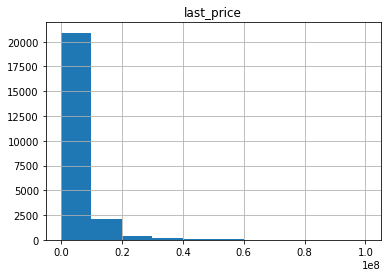

In [20]:
#Цена на момент снятия с публикации
data.hist('last_price',range=(0,100000000)) #,figsize=(15, 20) ,bins=2
#Сколько объялений в диапазоне?
print(len(data.query('500000000<=last_price<= 1000000000.0')) )#.pivot_table(index='locality_name_good', values='ceiling_height')#.plot()#, aggfunc='count').plot(grid=True, figsize=(12, 5))


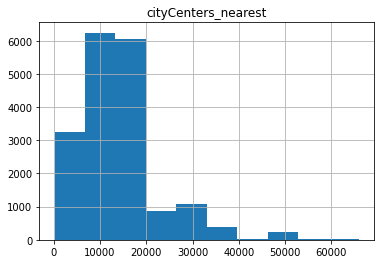

In [21]:
#расстояние до центра города (м)
data.hist('cityCenters_nearest'); #,range=(0,100000000)) #,figsize=(15, 20) ,bins=2
#Сколько объялений в диапазоне?


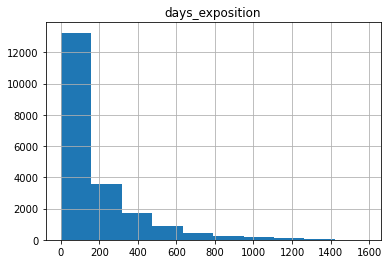

In [22]:
#сколько дней было размещено объявление (от публикации до снятия)
data.hist('days_exposition'); #,range=(0,100000000)) #,figsize=(15, 20) ,bins=2
#Сколько объялений в диапазоне?


60
37
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, locality_name_good]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, locality_name_good]
Index: []

[0 rows x 23 columns]


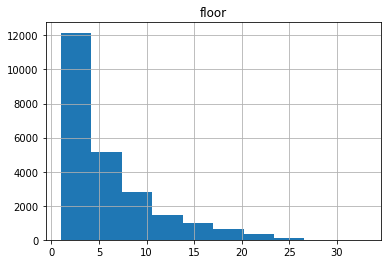

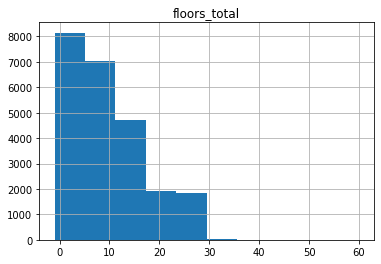

In [23]:
#этаж и всего этажей в доме
data.hist('floor'); #,range=(0,100000000)) #,figsize=(15, 20) ,bins=2
data.hist('floors_total')
print (data['floors_total'].max())
#По поиску в Интернет, в СПб нет такого высокого жилого здания (только до 45 эт).
data=data.query('floors_total<=45 | floors_total.isnull()')
print (data['floors_total'].max())
#Есть данные, где этаж больше количества этажей в доме? Нет
print (data.query('floor>floors_total & floors_total!=-1') )
#Этаж = 0 тоже нет
print (data.query('floor==0') )

In [24]:
#УЧТЕНО ЗАМЕЧАНИЕ РЕВЬЮЕРА (ниже на красном фоне)
print('Доля от изначального количества данных, которая осталась после предобработки: {:.0%}'.
      format(len(data)/len1))

Доля от изначального количества данных, которая осталась после предобработки: 100%


*Обработал аномалии*

### Посчитайте и добавьте в таблицу новые столбцы

•	цена одного квадратного метра;



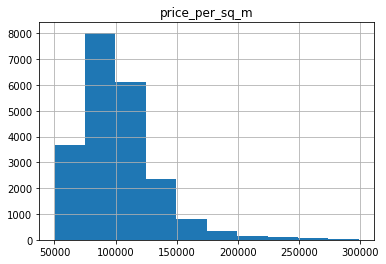

In [25]:
data['price_per_sq_m'] = data['last_price'] / data['total_area']
#оставляем реальные цены по данным Интернет
data=data.query('300000>price_per_sq_m>50000') 
#print(sorted(data['price_per_sq_m'].unique()))
data.hist('price_per_sq_m');

•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
•	месяц публикации объявления;
•	год публикации объявления;


In [26]:
data['first_day_exposition_dow'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['first_day_exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_day_exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

•	тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [27]:
def def_floor_type(row):
    if row['floor'] == 1:
        return ('первый')
    if (row['floor'] ==row['floors_total']):
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(def_floor_type,axis=1) # в функцию будет передана строчка датафрейма
data[['floor', 'floors_total', 'floor_type']].head(20) # проверка

,floor,floors_total,floor_type
0,8,16,другой
1,1,11,первый
2,4,5,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой
10,3,12,другой


•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [28]:
data['cityCenters_nearest_km'] = round( data['cityCenters_nearest']/1000, 0)
data[['cityCenters_nearest','cityCenters_nearest_km']].head() # проверка

,cityCenters_nearest,cityCenters_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
4,8098.0,8.0
5,NaN,NaN


### Проведите исследовательский анализ данных

1.	Изучите следующие параметры объектов: 

o	общая площадь;  
o	жилая площадь;  
o	площадь кухни;  
o	цена объекта;  
o	количество комнат;  
o	высота потолков;  
o	этаж квартиры;  
o	тип этажа квартиры («первый», «последний», «другой»);  
o	общее количество этажей в доме;  
o	расстояние до центра города в метрах;  
o	расстояние до ближайшего аэропорта;  
o	расстояние до ближайшего парка;  
o	день и месяц публикации объявления.  

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.



Min: 12.0 Max: 631.2


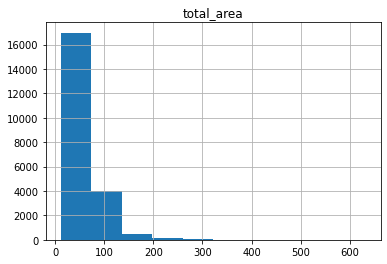

In [29]:
#общая площадь;
data.hist('total_area');
print ('Min:',data['total_area'].min(),'Max:',data['total_area'].max())
#Данные соответствуют Интернету 
#https://mir24.tv/news/16343727/nazvany-razmery-samoi-bolshoi-i-samoi-malenkoi-kvartir-v-peterburge

Min: 2.0 Max: 409.0 Median: 30.0


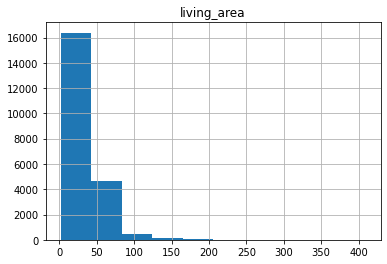

In [30]:
#жилая площадь;
data.hist('living_area');
print ('Min:',data['living_area'].min(),'Max:',data['living_area'].max(),'Median:',data['living_area'].median())


Min: 1.3 Max: 285.0576923076923 Median: 10.0


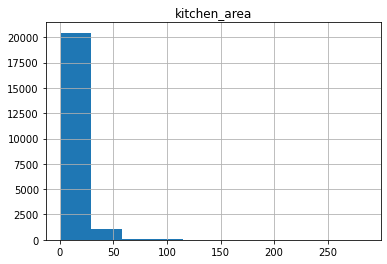

In [31]:
#площадь кухни;
data.hist('kitchen_area');
print ('Min:',data['kitchen_area'].min(),'Max:',data['kitchen_area'].max(),'Median:',data['kitchen_area'].median())


Min: 1150000.0 Max: 140000000.0 Median: 4850000.0


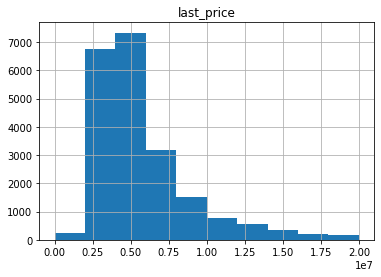

In [32]:
#Цена
data.hist('last_price',range=(0,20000000));
print ('Min:',data['last_price'].min(),'Max:',data['last_price'].max(),'Median:',data['last_price'].median())
#Данные соответствуют Интернету 
#https://mir24.tv/news/16343727/nazvany-razmery-samoi-bolshoi-i-samoi-malenkoi-kvartir-v-peterburge

Min: 0 Max: 19 Median: 2.0


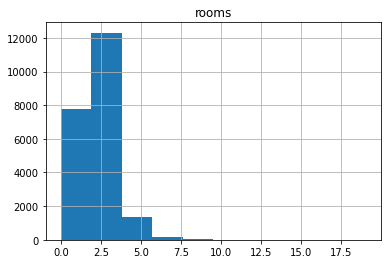

In [33]:
#количество комнат;
data.hist('rooms');
print ('Min:',data['rooms'].min(),'Max:',data['rooms'].max(),'Median:',data['rooms'].median())
#Данные соответствуют Интернету 
#https://mir24.tv/news/16343727/nazvany-razmery-samoi-bolshoi-i-samoi-malenkoi-kvartir-v-peterburge

Min: 1.75 Max: 5.8 Median: 2.65


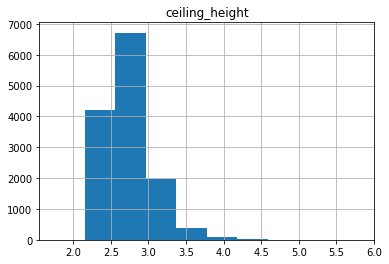

In [34]:
#высота потолков
data.hist('ceiling_height');
print ('Min:',data['ceiling_height'].min(),'Max:',data['ceiling_height'].max(),'Median:',data['ceiling_height'].median())


Min: 1 Max: 33 Median: 5.0


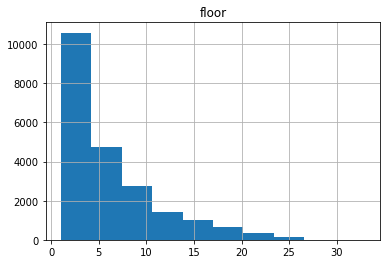

In [35]:
#этаж квартиры;
data.hist('floor');
print ('Min:',data['floor'].min(),'Max:',data['floor'].max(),'Median:',data['floor'].median())

floor_type
другой       16423
первый        2418
последний     2802
Name: floor_type, dtype: int64


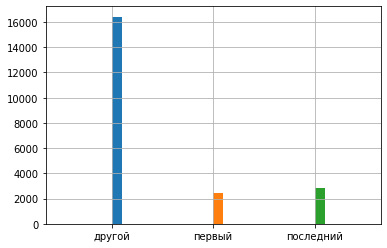

In [36]:
#тип этажа квартиры («первый», «последний», «другой»);
#data.hist(figsize=(15,20));

print(data.groupby('floor_type')['floor_type'].count())
data.groupby('floor_type')['floor_type'].hist();

Min: -1 Max: 37 Median: 9.0


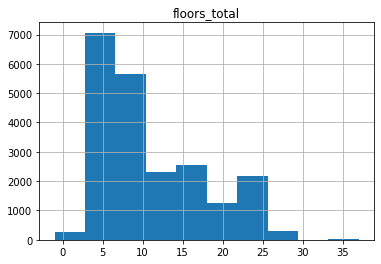

In [37]:
#общее количество этажей в доме
data.hist('floors_total');
print ('Min:',data['floors_total'].min(),'Max:',data['floors_total'].max(),
       'Median:',data['floors_total'].median())

Min: 181.0 Max: 65968.0 Median: 13149.0


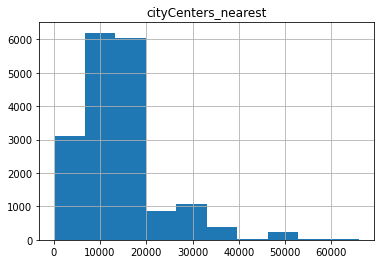

In [38]:
#расстояние до центра города в метрах;
data.hist('cityCenters_nearest',bins=10)
print ('Min:',data['cityCenters_nearest'].min(),'Max:',data['cityCenters_nearest'].max(),
       'Median:',data['cityCenters_nearest'].median())

Min: 0.0 Max: 84869.0 Median: 26757.0


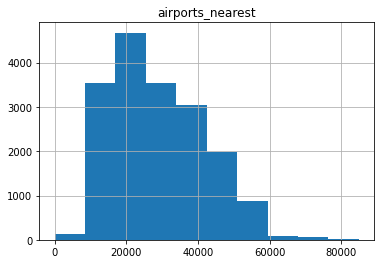

In [39]:
#airports_nearest - расстояние до ближайшего аэропорта;
data.hist('airports_nearest',bins=10)
print ('Min:',data['airports_nearest'].min(),'Max:',data['airports_nearest'].max(),
       'Median:',data['airports_nearest'].median())

Min: 0 Max: 3190 Median: 0.0


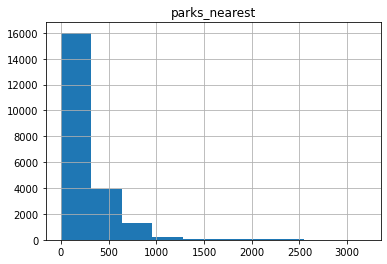

In [40]:
#расстояние до ближайшего парка;
data.hist('parks_nearest',bins=10)
print ('Min:',data['parks_nearest'].min(),'Max:',data['parks_nearest'].max(),
       'Median:',data['parks_nearest'].median())

first_day_exposition_dow
0    3312
1    3834
2    3646
3    3908
4    3664
5    1725
6    1554
Name: first_day_exposition_dow, dtype: int64


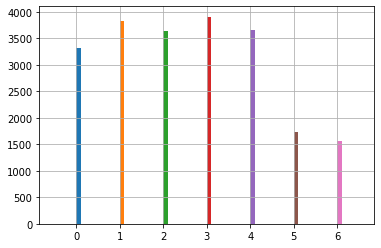

In [41]:
#день 0 — понедельник, 1 — вторник и так далее 
print(data.groupby('first_day_exposition_dow')['first_day_exposition_dow'].count())
data.groupby('first_day_exposition_dow')['first_day_exposition_dow'].hist();

first_day_exposition_month
1     1364
2     2393
3     2363
4     2185
5     1176
6     1584
7     1534
8     1600
9     1830
10    1957
11    2186
12    1471
Name: first_day_exposition_month, dtype: int64


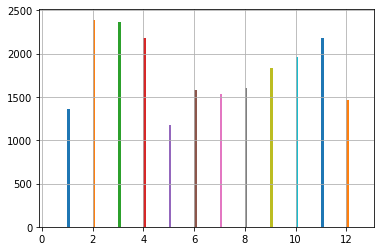

In [42]:
#месяц публикации объявления
print(data.groupby('first_day_exposition_month')['first_day_exposition_month'].count())
data.groupby('first_day_exposition_month')['first_day_exposition_month'].hist();


_Вывод 4_: больше всего квартир на продажу: 
1. имеют общую площадь до 75 кв.м, медианное значение 30 кв. м.;
2. имеют кухню до 10 кв.м, медианное значение 9,5 кв. м.;
3. продаются по цене от 4 до 5 млн. руб, медиана - 4850000. Это сходится с Интернетом https://mir24.tv/news/16343727/nazvany-razmery-samoi-bolshoi-i-samoi-malenkoi-kvartir-v-peterburge  ;
4. имеют медиану в 2 комнаты;
5. в высоту от 2 до 3 м, медиана 2,65 м;
6. расположены на этажах 1-4, медиана - 5 этаж;
7. находятся не на первом и не на последнем этаже (которых поровну), Не первых и не последних этажей в 6-7 раз больше первых/ последних;
8. продавалось в 5-этажках, медиана этажности -9;
9. в 9-20 км от центра города, медиана примерно 13 км.;
10. в 18-24 км от аэропорта, медиана примерно 27 км.;
11. в 0-3 км до парка, медиана 0 (не указан парк);
12. имеют публикации в БУДНИЕ ДНИ (в 2-3 раза больше, чем в выходные). Видимо, этим в основном занимаются риэлторы в рабочее время. Пик объявлений - с февраля по апрель, затем спад до минимума в мае и плавный рост до ноября. В декабре и январе - вновь спад.

2.	Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
o	Постройте гистограмму.
o	Посчитайте среднее и медиану.
o	В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

In [43]:
#Где поле days_exposition не заполнено? Видимо, квартира не продана.
data['days_exposition'].isna().sum()

2784

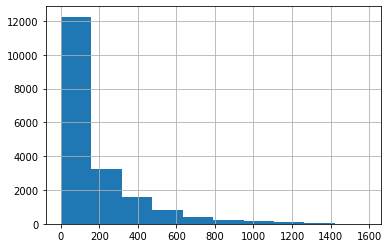

In [44]:
#Гистограмма
data['days_exposition'].hist();

In [45]:
print ('Min:',data['days_exposition'].min(),'Max:',data['days_exposition'].max(),
       'Mean:',round(data['days_exposition'].mean(),0),'Median:',data['days_exposition'].median())

Min: 1.0 Max: 1580.0 Mean: 180.0 Median: 95.0


In [46]:
#УЧТЕНО ЗАМЕЧАНИЕ РЕВЬЮЕРА (ниже на красном фоне)
#Сколько лет максимум?
print('Максимум продажа длилась (годы)', data['days_exposition'].max()/365 )

Максимум продажа длилась (годы) 4.328767123287672


_Вывод 5_. Медианный срок продажи - 

In [47]:
print (data['days_exposition'].median(), 'дней')

95.0 дней


Быстрыми будем считать продажи меньше медианы, долгими - больше (Максимум продажа длилась 4 с лишним года).

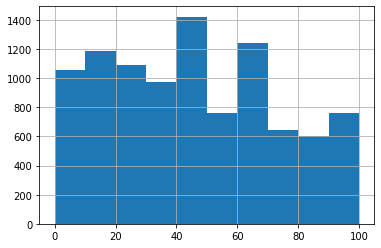

In [48]:
#УЧТЕНО ЗАМЕЧАНИЕ РЕВЬЮЕРА (ниже на красном фоне)
#Гистограмма 
data['days_exposition'].hist(range=(0,100));

<div class="alert alert-block alert-info">
    Не готов считать пики выбросами, так как 
покупательская способность на жилье зависит слишком от многих факторов

</div>


3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:  
	общей площади;  
	жилой площади;  
	площади кухни;  
	количества комнат;  
	этажа, на котором расположена квартира (первый, последний, другой);  
	даты размещения (день недели, месяц, год).  
    
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Коэффициент корреляции цены от общей площади 0.8463779035021471


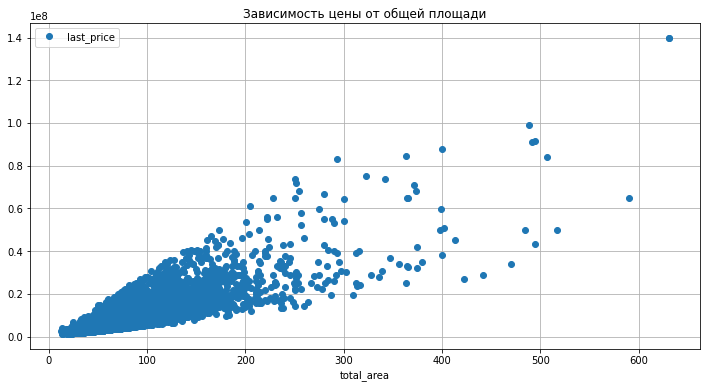

In [50]:
data.plot(x='total_area', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от общей площади');
print('Коэффициент корреляции цены от общей площади',data['total_area'].corr(data['last_price']) )

Коэффициент корреляции цены от жилой площади 0.770553499259332


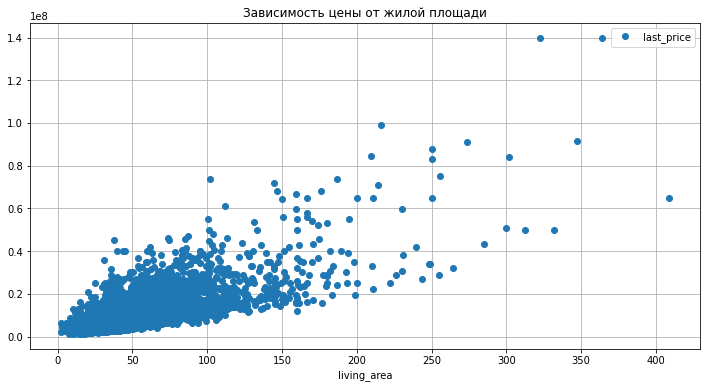

In [51]:
print('Коэффициент корреляции цены от жилой площади',data['living_area'].corr(data['last_price']) )
data.plot(x='living_area', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от жилой площади');

Коэффициент корреляции цены от площади кухни 0.44912498484622104


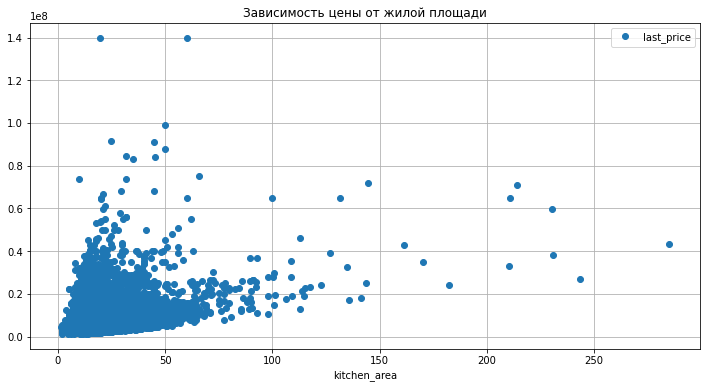

In [52]:
print('Коэффициент корреляции цены от площади кухни',data['kitchen_area'].corr(data['last_price']) )
data.plot(x='kitchen_area', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от жилой площади');

Коэффициент корреляции цены от количества комнат 0.5470768414434318


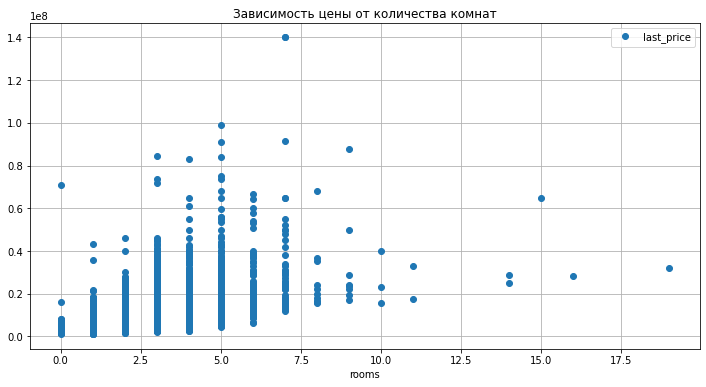

In [53]:
print('Коэффициент корреляции цены от количества комнат',data['rooms'].corr(data['last_price']) )
data.plot(x='rooms', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от количества комнат');

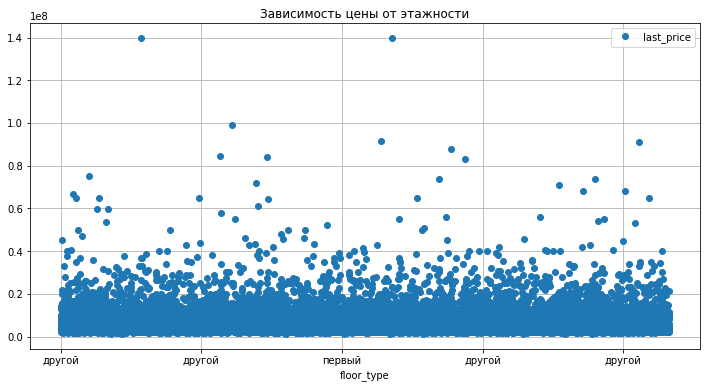

In [54]:
##УЧТЕНО ЗАМЕЧАНИЕ РЕВЬЮЕРА (на красном фоне)
#print('Коэффициент корреляции цены от этажности',data['floor'].corr(data['last_price']) )
data.plot(x='floor_type', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от этажности');

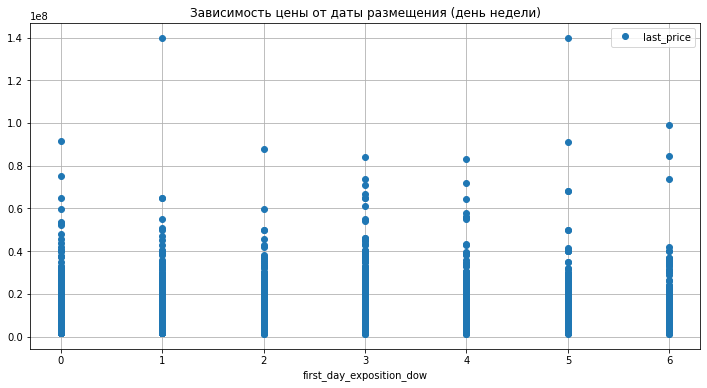

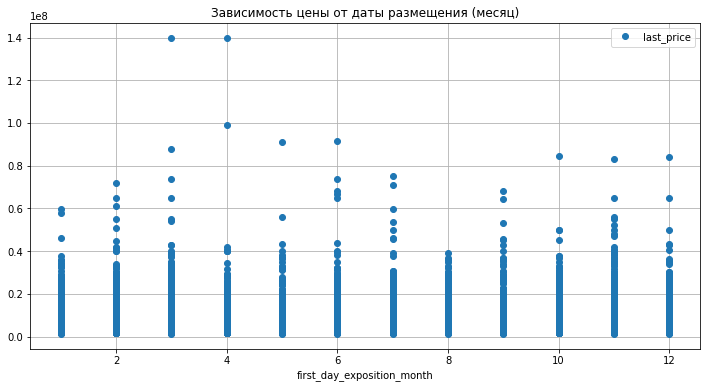

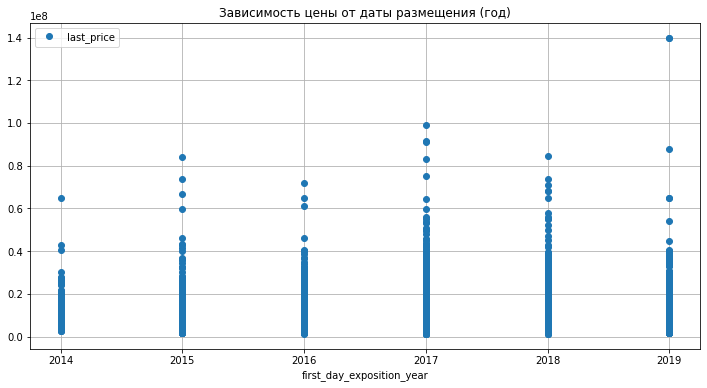

In [55]:
#УЧТЕНО ЗАМЕЧАНИЕ РЕВЬЮЕРА (на красном фоне)
#print('Коэффициент корреляции цены от даты размещения (день недели).',data['first_day_exposition_dow'].corr(data['last_price']) )
#print('Коэффициент корреляции цены от даты размещения (месяц).',data['first_day_exposition_month'].corr(data['last_price']) )
#print('Коэффициент корреляции цены от даты размещения (год).',data['first_day_exposition_year'].corr(data['last_price']) )
data.plot(x='first_day_exposition_dow', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от даты размещения (день недели)');
data.plot(x='first_day_exposition_month', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от даты размещения (месяц)');
data.plot(x='first_day_exposition_year', y='last_price', style='o', grid=True, 
          figsize=(12, 6),title='Зависимость цены от даты размещения (год)');

_Вывод 6:_ 
Коэффициент корреляции (КК) цены от общей площади 0.85, больше всего цена зависит именно от нее. Во вторую очередь - от жилой площади (КК = 0,77).

4.	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [56]:
#10 населённых пунктов с наибольшим числом объявлений
lng_total=data.pivot_table(index='locality_name_good',values='last_price',aggfunc='count').reset_index
#print (lng_total().sort_values('last_price',ascending=False).head(10) )
lng_total = lng_total().sort_values('last_price',ascending=False).head(10)
#print( data[['locality_name_good','price_per_sq_m']].query('locality_name_good =="Санкт-Петербург"').mean() )
#Оставляем в result только то, что входит в lng_total - 10 населённых пунктов с наибольшим числом объявлений
result=data.merge(lng_total, on='locality_name_good', how='inner')
#result[['locality_name_good','price_per_sq_m']]
#средняя цена кв.м.
#print (data.pivot_table(index='locality_name_good',values='price_per_sq_m',aggfunc='mean').query('locality_name_good =="Санкт-Петербург"') )
print (result.pivot_table(index='locality_name_good',values='price_per_sq_m',aggfunc='mean').
       sort_values('price_per_sq_m') )


                    price_per_sq_m
locality_name_good                
Всеволожск            68567.074766
Гатчина               70244.474284
Колпино               75506.084166
посёлок Шушары        78955.042197
Петергоф              84757.559690
посёлок Мурино        85746.054065
посёлок Парголово     90590.643794
деревня Кудрово       92473.547576
Пушкин               103125.819291
Санкт-Петербург      111227.614559


_Вывод 7_: населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург, населённый пункт с самой низкой стоимостью квадратного метра (из 10 населённых пунктов с наибольшим числом объявлений) - Всеволожск.            

5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [57]:
data[['locality_name_good','cityCenters_nearest_km','price_per_sq_m']]

,locality_name_good,cityCenters_nearest_km,price_per_sq_m
0,Санкт-Петербург,16.0,120370.370370
1,посёлок Шушары,19.0,82920.792079
2,Санкт-Петербург,14.0,92785.714286
4,Санкт-Петербург,8.0,100000.000000
5,посёлок городского типа Янино-1,NaN,95065.789474
...,...,...,...
23691,Санкт-Петербург,4.0,129903.978052
23693,Петергоф,34.0,73717.948718
23694,Санкт-Петербург,4.0,72490.845228
23695,Тосно,NaN,52542.372881


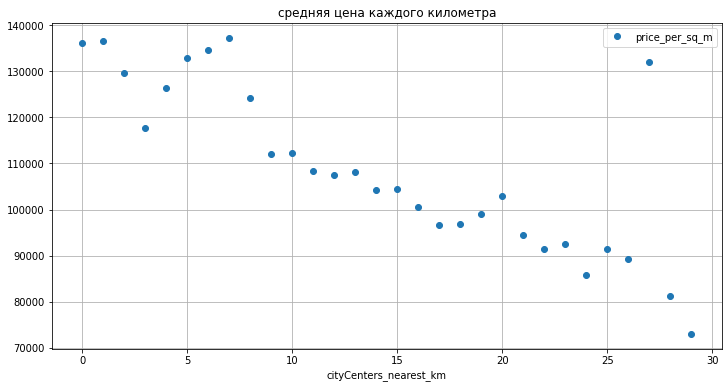

In [58]:
#Запрос
dq=data.query('locality_name_good =="Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km',values='price_per_sq_m',aggfunc='mean')
#data.query('locality_name_good =="Санкт-Петербург"').plot(x='cityCenters_nearest_km', y='price_per_sq_m', style='o', grid=True, figsize=(12, 6),title='средняя цена каждого километра');
dq.plot(style='o', grid=True, figsize=(12, 6),title='средняя цена каждого километра');

_Вывод 8_. Чем дельше от центра, тем ниже цена за квадратный метр жилья в СпБ.

### Общий вывод

Вывод 1. Пропуски данных - либо не указаны в объявлении, либо человеческий фактор.  
Вывод 2. Поменяли типы дынных для экономии памяти (float24 на int24) и корректности (object на bool).   
Вывод 3. Проведя анализ названий в EXCEL, выделяем названия с большой буквы и удаляем неявные дубликаты (с 365 до 323 шт).  
Вывод 4: больше всего квартир на продажу: 
1. имеют общую площадь до 75 кв.м, медианное значение 30 кв. м.;
2. имеют кухню до 10 кв.м, медианное значение 9,5 кв. м.;
3. продаются по цене от 4 до 5 млн. руб, медиана - 4850000. Это сходится с Интернетом https://mir24.tv/news/16343727/nazvany-razmery-samoi-bolshoi-i-samoi-malenkoi-kvartir-v-peterburge  ;
4. имеют медиану в 2 комнаты;
5. в высоту от 2 до 3 м, медиана 2,65 м;
6. расположены на этажах 1-4, медиана - 5 этаж;
7. находятся не на первом и не на последнем этаже (которых поровну), Не первых и не последних этажей в 6-7 раз больше первых/ последних;
8. продавалось в 5-этажках, медиана этажности -9;
9. в 9-20 км от центра города, медиана примерно 13 км.;
10. в 18-24 км от аэропорта, медиана примерно 27 км.;
11. в 0-3 км до парка, медиана 0 (не указан парк);
12. имеют публикации в БУДНИЕ ДНИ (в 2-3 раза больше, чем в выходные). Видимо, этим в основном занимаются риэлторы в рабочее время. Пик объявлений - с февраля по апрель, затем спад до минимума в мае и плавный рост до ноября. В декабре и январе - вновь спад.  

Вывод 5. Медианный срок продажи 95 дней. Быстрыми будем считать продажи меньше медианы, долгими - больше (Максимум продажа длилась 4 с лишним года).  
Вывод 6: Коэффициент корреляции (КК) цены от общей площади 0.85, больше всего цена зависит именно от нее. Во вторую очередь - от жилой площади (КК = 0,76).  
Вывод 7: населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург, населённый пункт с самой низкой стоимостью квадратного метра (из 10 населённых пунктов с наибольшим числом объявлений) - Всеволожск.  
Вывод 8. Чем дельше от центра, тем ниже цена за квадратный метр жилья в СпБ.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод